In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
user=pd.read_csv("/datasets/megaline_users.csv")
user.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


We have to change data type of reg_date and churn date

In [6]:
user['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Albany-Schenectady-Troy, NY MSA                     1
Greensboro-High Point, NC MSA                       1
Jacksonville, FL MSA                                1
Cape Coral-Fort Myers, FL MSA                       1
El Paso, TX MSA                                     1
Name: city, Length: 73, dtype: int64

In [7]:
user[user['churn_date'].notnull()]['churn_date']

6      2018-12-18
12     2018-11-16
22     2018-09-07
40     2018-12-30
50     2018-10-07
54     2018-12-31
67     2018-11-24
83     2018-12-18
84     2018-11-11
94     2018-12-12
106    2018-11-14
129    2018-12-27
172    2018-11-29
180    2018-12-22
186    2018-12-31
191    2018-11-30
220    2018-10-13
246    2018-07-31
269    2018-12-15
281    2018-11-14
296    2018-12-18
298    2018-12-19
300    2018-12-19
315    2018-10-03
358    2018-10-22
363    2018-08-16
402    2018-12-26
414    2018-09-01
416    2018-11-21
441    2018-08-19
451    2018-12-10
466    2018-09-17
467    2018-11-18
491    2018-09-18
Name: churn_date, dtype: object

I have filled missing churn dates below.

In [8]:
user['churn_date']=pd.to_datetime(user['churn_date'],format='%Y-%m-%d')   #changing data type to datetime64
user['reg_date']=pd.to_datetime(user['reg_date'],format='%Y-%m-%d')

In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
calls=pd.read_csv('/datasets/megaline_calls.csv')
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


We have to change data type of call date to datetime64

In [12]:
calls['call_date']=pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [13]:
calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

In [14]:
print(calls['duration'].min())
print(calls['duration'].max())

0.0
37.6


In [15]:
calls[calls['duration']==0]['duration'].count()/len(calls)

0.1948233927469416

calls with duration of 0 min accounts for 20% of our data hence we can not remove them.Since megaline always rounds up to the nearest minute we can replace 0.0 minutes with 1 minute. 

In [16]:
calls.loc[calls['duration']==0,'duration']=1

In [17]:
calls['duration'].min()

0.01

This is because all 0's have been replaced by 1.Later in the code we will round up values so 0.01 will be replaced by 1.Hence 1 will be the least duration

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [19]:
internet=pd.read_csv('/datasets/megaline_internet.csv')
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
#changing data type of session date
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

In [22]:
internet['session_date'].max()

Timestamp('2018-12-31 00:00:00')

In [23]:
internet[internet['mb_used']==0]['mb_used'].count()/len(internet)

0.1311423801574052

0 value for mb_used occurs for 13% data hence we do not remove them. Again replacing 0 mb with 1 because megaline rounds it up.

In [24]:
internet.loc[internet['mb_used']==0,'mb_used']=1

In [25]:
internet['mb_used'].min()

0.01

In [26]:
messages=pd.read_csv('/datasets/megaline_messages.csv')
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [27]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
#changing data type
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

In [29]:
plan=pd.read_csv('/datasets/megaline_plans.csv')
plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [30]:
messages['message_date'].max()

Timestamp('2018-12-31 00:00:00')

From the maximum value in dataframes calls, messages and internet we find that no user was active after 2018-12-31.

Since the data is for 2018 and missing churn date implies that the user was active on that plan when the data was extracted and there is no way to find the exact churn date, we fill missing values with 2018-12-31 

In [31]:
user['churn_date'].fillna(pd.to_datetime('2018-12-31'),inplace=True)          #filling missing values

In [32]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [33]:
user1=user[['user_id','reg_date','churn_date']]
user1.head()

,user_id,reg_date,churn_date
0,1000,2018-12-24,2018-12-31
1,1001,2018-08-13,2018-12-31
2,1002,2018-10-21,2018-12-31
3,1003,2018-01-28,2018-12-31
4,1004,2018-05-23,2018-12-31


# For each user, calls,minutes,messages,internet data per month

In [34]:
calls1=calls.merge(user1,on='user_id',how='left')
messages1=messages.merge(user1,on='user_id',how='left')
internet1=internet.merge(user1,on='user_id',how='left')

Checking if user was active after churn date.

In [35]:
calls1[calls1['call_date']>calls1['churn_date']]

,id,user_id,call_date,duration,reg_date,churn_date
973,1006_50,1006,2018-12-21,12.30,2018-11-27,2018-12-18
976,1006_74,1006,2018-12-26,9.12,2018-11-27,2018-12-18
3561,1012_1,1012,2018-12-19,1.00,2018-06-28,2018-11-16
3562,1012_2,1012,2018-12-23,2.53,2018-06-28,2018-11-16
3563,1012_3,1012,2018-12-07,1.00,2018-06-28,2018-11-16
...,...,...,...,...,...,...
135668,1491_639,1491,2018-11-26,4.87,2018-04-27,2018-09-18
135670,1491_641,1491,2018-12-14,10.39,2018-04-27,2018-09-18
135671,1491_642,1491,2018-10-08,6.91,2018-04-27,2018-09-18
135672,1491_644,1491,2018-11-29,11.17,2018-04-27,2018-09-18


In [36]:
messages1[messages1['message_date']>messages1['churn_date']]

,id,user_id,message_date,reg_date,churn_date
544,1006_2,1006,2018-12-25,2018-11-27,2018-12-18
547,1006_12,1006,2018-12-20,2018-11-27,2018-12-18
548,1006_14,1006,2018-12-29,2018-11-27,2018-12-18
549,1006_15,1006,2018-12-20,2018-11-27,2018-12-18
552,1006_30,1006,2018-12-23,2018-11-27,2018-12-18
...,...,...,...,...,...
75641,1491_578,1491,2018-11-04,2018-04-27,2018-09-18
75648,1491_589,1491,2018-11-20,2018-04-27,2018-09-18
75650,1491_591,1491,2018-11-27,2018-04-27,2018-09-18
75652,1491_597,1491,2018-10-17,2018-04-27,2018-09-18


In [37]:
internet1[internet1['session_date']>internet1['churn_date']]

,id,user_id,session_date,mb_used,reg_date,churn_date
948,1006_14,1006,2018-12-24,342.75,2018-11-27,2018-12-18
954,1006_25,1006,2018-12-22,349.08,2018-11-27,2018-12-18
955,1006_26,1006,2018-12-25,309.67,2018-11-27,2018-12-18
956,1006_31,1006,2018-12-24,557.89,2018-11-27,2018-12-18
957,1006_49,1006,2018-12-25,95.65,2018-11-27,2018-12-18
...,...,...,...,...,...,...
102752,1491_247,1491,2018-10-30,341.79,2018-04-27,2018-09-18
102753,1491_249,1491,2018-11-28,124.95,2018-04-27,2018-09-18
102755,1491_251,1491,2018-12-24,428.70,2018-04-27,2018-09-18
102761,1491_262,1491,2018-11-11,288.54,2018-04-27,2018-09-18


This is anomaly in the data.Hence we remove these rows from our analysis.

In [38]:
calls1=calls1[calls1['call_date']<=calls1['churn_date']]
messages1=messages1[messages1['message_date']<=messages1['churn_date']]
internet1=internet1[internet1['session_date']<=internet1['churn_date']]

Rounding up minutes and megabytes used.

In [39]:
calls1['duration']=np.ceil(calls1['duration'])
internet1['mb_used']=np.ceil(internet1['mb_used'])


In [40]:

calls1['month']=(calls1['call_date']-calls1['reg_date'])/np.timedelta64(1,'D')
calls1['month']=calls1['month']/30
calls1['month']=np.ceil(calls1['month']).astype(int)
calls1

,id,user_id,call_date,duration,reg_date,churn_date,month
0,1000_93,1000,2018-12-27,9.0,2018-12-24,2018-12-31,1
1,1000_145,1000,2018-12-27,14.0,2018-12-24,2018-12-31,1
2,1000_247,1000,2018-12-27,15.0,2018-12-24,2018-12-31,1
3,1000_309,1000,2018-12-28,6.0,2018-12-24,2018-12-31,1
4,1000_380,1000,2018-12-30,5.0,2018-12-24,2018-12-31,1
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,2018-05-06,2018-12-31,7
137731,1499_200,1499,2018-10-20,11.0,2018-05-06,2018-12-31,6
137732,1499_201,1499,2018-09-21,9.0,2018-05-06,2018-12-31,5
137733,1499_202,1499,2018-10-10,1.0,2018-05-06,2018-12-31,6


In [41]:
calls_per_user=calls1.pivot_table(index=['user_id','month'],values='duration',aggfunc=['count','sum'])
calls_per_user

count      sum
              duration duration
user_id month                  
1000    1           16    124.0
1001    1           47    307.0
        2           44    289.0
        3           71    467.0
        4           67    472.0
...                ...      ...
1499    4            2     17.0
        5           43    366.0
        6           50    367.0
        7           49    344.0
        8           60    474.0

[2332 rows x 2 columns]

In [42]:
messages1['month']=(messages1['message_date']-messages1['reg_date'])/np.timedelta64(1,'D')
messages1['month']=np.ceil(messages1['month']/30).astype(int)
messages1
messages_per_user=messages1.pivot_table(index=['user_id','month'],values='id',aggfunc='count')
messages_per_user

id
user_id month    
1000    1      11
1001    1      47
        2      44
        3      49
        4      38
...            ..
1496    8      23
        9      16
        10     10
        11      5
1497    1      50

[1865 rows x 1 columns]

In [43]:
internet1['month']=np.ceil((internet1['session_date']-internet1['reg_date'])/np.timedelta64(1,'D')/30)
internet1['month']=internet1['month'].astype(int)
internet_per_user=internet1.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
internet_per_user

mb_used
user_id month         
1000    1       1904.0
1001    1      12075.0
        2      18557.0
        3      18531.0
        4      17838.0
...                ...
1498    11     22824.0
1499    5      14853.0
        6      18679.0
        7      17345.0
        8      20601.0

[2356 rows x 1 columns]

In [44]:
all_users=calls_per_user.join([messages_per_user,internet_per_user],how='outer')
all_users.columns=['calls','minutes','messages','mb_used']
all_users

calls  minutes  messages  mb_used
user_id month                                   
1000    1       16.0    124.0      11.0   1904.0
1001    1       47.0    307.0      47.0  12075.0
        2       44.0    289.0      44.0  18557.0
        3       71.0    467.0      49.0  18531.0
        4       67.0    472.0      38.0  17838.0
...              ...      ...       ...      ...
1499    4        2.0     17.0       NaN      NaN
        5       43.0    366.0       NaN  14853.0
        6       50.0    367.0       NaN  18679.0
        7       49.0    344.0       NaN  17345.0
        8       60.0    474.0       NaN  20601.0

[2370 rows x 4 columns]

In [45]:
user_plan=user[['user_id','tariff']]
user_plan.set_index('user_id',inplace=True)
total=user_plan.join(all_users,how='outer')
total

tariff  calls  minutes  messages  mb_used
user_id month                                             
1000    1      ultimate   16.0    124.0      11.0   1904.0
1001    1          surf   47.0    307.0      47.0  12075.0
        2          surf   44.0    289.0      44.0  18557.0
        3          surf   71.0    467.0      49.0  18531.0
        4          surf   67.0    472.0      38.0  17838.0
...                 ...    ...      ...       ...      ...
1499    4          surf    2.0     17.0       NaN      NaN
        5          surf   43.0    366.0       NaN  14853.0
        6          surf   50.0    367.0       NaN  18679.0
        7          surf   49.0    344.0       NaN  17345.0
        8          surf   60.0    474.0       NaN  20601.0

[2370 rows x 5 columns]

In [46]:
total[total[['calls','minutes','messages','mb_used']].isnull().all(axis=1)]

,,tariff,calls,minutes,messages,mb_used
user_id,month,,,,,


In [47]:
total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2370 entries, (1000, 1) to (1499, 8)
Data columns (total 5 columns):
tariff      2370 non-null object
calls       2332 non-null float64
minutes     2332 non-null float64
messages    1865 non-null float64
mb_used     2356 non-null float64
dtypes: float64(4), object(1)
memory usage: 103.7+ KB


In [48]:
plan

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Calculating profit per month

In [49]:
def profit_call(row1):
    p=plan[plan['plan_name']==row1['tariff']]
    #print(p['minutes_included'])
    a=np.float(p['minutes_included'])
    b=np.float(p['usd_per_minute'])
    if row1['minutes']>a:
        profit_min=(row1['minutes']-a)*b
        return profit_min
    #profit_min=0
    #print(profit_min)
    return 0

def profit_message(row2):
    p=plan[plan['plan_name']==row2['tariff']]
    a=np.float(p['messages_included'])
    b=np.float(p['usd_per_message'])
    if row2['messages']>a:
        profit_m=(row2['messages']-a)*b
        return profit_m
    #profit_m=0
    return 0

def profit_data(row3):
    p=plan[plan['plan_name']==row3['tariff']]
    a=np.float(p['mb_per_month_included'])
    b=np.float(p['usd_per_gb'])
    if row3['mb_used']>a:
        extra_gb=np.ceil((row3['mb_used']-a)/1024)
        return extra_gb*b
    return 0

def profit(row):
    p=plan[plan['plan_name']==row['tariff']]
    #print(row['minutes'])
    pc=profit_call(row)
    pm=profit_message(row)
    pd=profit_data(row)
    pay=np.int(p['usd_monthly_pay'])
    #print(pc,pm,pd,pay)
    total_profit= pc+pd+pm+pay
    #print(total_profit)
    return total_profit
    

total['profit']=total.apply(profit,axis=1)
total

tariff  calls  minutes  messages  mb_used  profit
user_id month                                                     
1000    1      ultimate   16.0    124.0      11.0   1904.0    70.0
1001    1          surf   47.0    307.0      47.0  12075.0    20.0
        2          surf   44.0    289.0      44.0  18557.0    60.0
        3          surf   71.0    467.0      49.0  18531.0    60.0
        4          surf   67.0    472.0      38.0  17838.0    50.0
...                 ...    ...      ...       ...      ...     ...
1499    4          surf    2.0     17.0       NaN      NaN    20.0
        5          surf   43.0    366.0       NaN  14853.0    20.0
        6          surf   50.0    367.0       NaN  18679.0    60.0
        7          surf   49.0    344.0       NaN  17345.0    40.0
        8          surf   60.0    474.0       NaN  20601.0    80.0

[2370 rows x 6 columns]

In [50]:
avg_stats=total.groupby(level='user_id').mean()
# grouping by user_id and calculating mean values for each user
avg_stats

,calls,minutes,messages,mb_used,profit
user_id,,,,,
1000,16.000000,124.000000,11.000000,1904.000000,70.000000
1001,52.200000,357.400000,41.400000,16115.000000,42.000000
1002,37.666667,282.666667,29.333333,13455.666667,40.000000
1003,74.500000,567.500000,25.000000,13535.000000,22.025000
1004,46.250000,354.500000,22.125000,19576.250000,72.537500
...,...,...,...,...,...
1495,63.250000,452.500000,NaN,24763.750000,115.510000
1496,32.500000,248.666667,13.000000,10734.833333,23.333333
1497,54.000000,312.000000,50.000000,11124.000000,70.000000


In [51]:
avg_stats=avg_stats.join(user_plan)


Creating separate dataframes for users of ultimate plan and surf plan

In [52]:
ultimate_users=avg_stats[avg_stats['tariff']=='ultimate']
surf_users=avg_stats[avg_stats['tariff']=='surf']

# Analyzing the data

Calculating descriptive statistics for users of both plans and plotting histograms

In [53]:
ultimate_users.describe()

,calls,minutes,messages,mb_used,profit
count,153.000000,153.000000,130.000000,155.000000,155.000000
mean,53.706383,391.228640,41.727937,14771.043036,71.272408
std,26.734366,196.966005,27.119719,5744.296411,6.133935
min,4.000000,12.000000,1.500000,235.000000,70.000000
25%,33.857143,245.428571,21.700000,11184.833333,70.000000
50%,54.000000,388.000000,39.833333,14664.500000,70.000000
75%,68.500000,498.500000,57.875000,18420.500000,70.000000
max,146.000000,1083.285714,143.111111,35504.090909,122.500000


The users of ultimate plan require on average 54 calls, 392 minutes, 42 messages and 14771 mb of internet per month.

# Histograms for users of ultimate plan

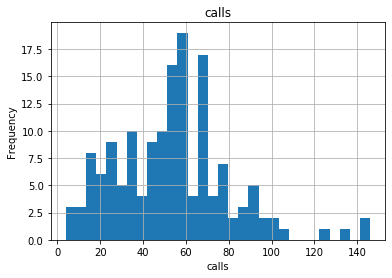

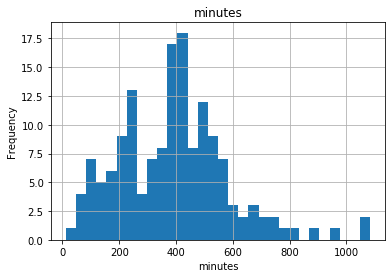

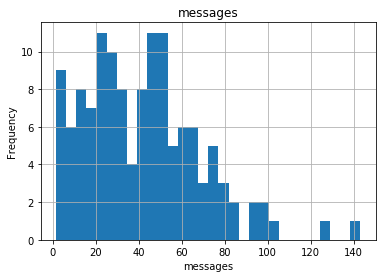

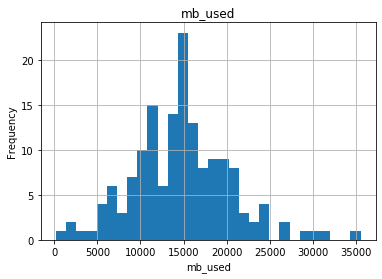

In [54]:
data=['calls','minutes','messages','mb_used']
for d in data:
    ultimate_users.hist(d,bins=30)
    plt.ylabel("Frequency")
    plt.xlabel(d)

From the calls histogram we see that most users made between 50 to 60 calls. Less than 10 people made more than 70 calls per month.
The histogram of minutes shows that users mostly require around 400 minutes per month which is much less than 3000, number of minutes offered in the ultimate plan.The maximum minutes in our data is close to 1000 which is also less than that offered.
From the messages histogram we see that there are two peaks one close to 25 and another close to 50. The maximum number of messages send is about 143 which is much less than the number of messages included in the plan,1000.
The histogram of internet usage looks very symmetrical about 15000.We can say most of the users of ultimate plan use 14000 to 16000 mb per month whereas that included in the plan is 30000.

In [55]:
surf_users.describe()

,calls,minutes,messages,mb_used,profit
count,325.000000,325.000000,269.000000,331.000000,332.000000
mean,54.769313,403.771671,37.611984,15061.275357,52.720613
std,25.057696,188.954343,27.173075,6058.520302,39.510974
min,2.000000,6.000000,1.000000,93.000000,20.000000
25%,37.666667,277.400000,17.777778,11487.100000,24.444444
50%,53.400000,387.714286,30.100000,15261.125000,41.128750
75%,70.000000,518.000000,52.250000,18076.875000,64.315179
max,146.000000,1067.000000,137.000000,44394.000000,316.780000


The users of surf plan require on average 55 calls, 404 minutes, 38 messages and 15061 mb of internet per month.

# Histograms for users of surf plan

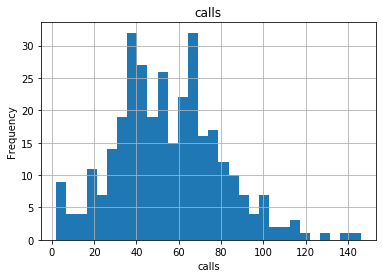

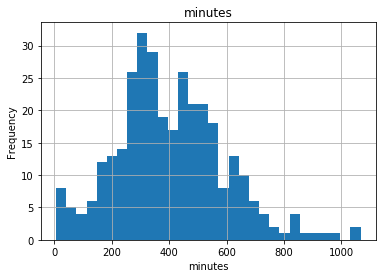

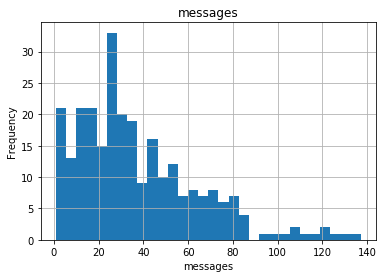

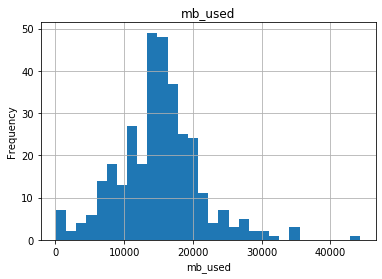

In [56]:
data=['calls','minutes','messages','mb_used']
for d in data:
    surf_users.hist(d,bins=30)
    plt.ylabel("Frequency")
    plt.xlabel(d)

The Calls histogram has two peaks one around 40 and other one close to 65.The number of calls per month rarely exceeds 90 calls. 
Minutes histogram shows that mostly users spend around 300 minutes in calls. Very few users use more than 600 minutes. The number of minutes offered in the plan are 500 which are rarely crossed.
Messages histogram shows that users mostly send around 25 messages per month whereas the number of messages included in the plan are 50.
The histogram of mb usage shows the peak is around 15000 which is the volume of data included in the pack. We can also say that many users cross the data limit in the surf plan.


From both these histograms we see that the behaviour of users of both ultimate plan and surf plan is similar especially for the minutes of calls used and mb used. 

# Testing of Hypothesis

In [57]:
ultimate_profit=total[total['tariff']=='ultimate']['profit']
surf_profit=total[total['tariff']=='surf']['profit']

Null hypothesis: The average profit from ultimate users does not differ from surf users
Alternate hypothesis: The average profit from ultimate users differs significantly from surf users

In [58]:
from scipy import stats as st

results2 = st.ttest_ind(ultimate_profit, surf_profit)

alpha=0.05

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  6.995712278110773e-17
We reject the null hypothesis



The p value tells us that there is a very small probability(close to 0) of getting a difference of this magnitude between the profits from users of ultimate plan and surf plan. 
Since the null hypothesis has been rejected we conclude that the average profit from users of ultimate and surf plan differs significantly.Also the magnitude of p value is very small which means that the difference between the average profits is very large. 

For the above testing we have applied t test for equality of two population means with equal variances.This test has been used due to the following reasons:1. The samples are independent.For each user we have data on either of the two plans so no user belongs to both samples.2. Since the data is about users of different calling plans of the same company both samples can be considered to belong to the same population.

In [59]:
area=user[['user_id','city']]
area.set_index('user_id',inplace=True)
total_area=area.join(total,how='outer')
total_area

city    tariff  calls  \
user_id month                                                           
1000    1      Atlanta-Sandy Springs-Roswell, GA MSA  ultimate   16.0   
1001    1            Seattle-Tacoma-Bellevue, WA MSA      surf   47.0   
        2            Seattle-Tacoma-Bellevue, WA MSA      surf   44.0   
        3            Seattle-Tacoma-Bellevue, WA MSA      surf   71.0   
        4            Seattle-Tacoma-Bellevue, WA MSA      surf   67.0   
...                                              ...       ...    ...   
1499    4          Orlando-Kissimmee-Sanford, FL MSA      surf    2.0   
        5          Orlando-Kissimmee-Sanford, FL MSA      surf   43.0   
        6          Orlando-Kissimmee-Sanford, FL MSA      surf   50.0   
        7          Orlando-Kissimmee-Sanford, FL MSA      surf   49.0   
        8          Orlando-Kissimmee-Sanford, FL MSA      surf   60.0   

               minutes  messages  mb_used  profit  
user_id month                                      
1000    1        124.0      11.0   1904.0    70.0  
1001    1        307.0      47.0  12075.0    20.0  
        2        289.0      44.0  18557.0    60.0  
        3        467.0      49.0  18531.0    60.0  
        4        472.0      38.0  17838.0    50.0  
...                ...       ...      ...     ...  
1499    4         17.0       NaN      NaN    20.0  
        5        366.0       NaN  14853.0    20.0  
        6        367.0       NaN  18679.0    60.0  
        7        344.0       NaN  17345.0    40.0  
        8        474.0       NaN  20601.0    80.0  

[2370 rows x 7 columns]

In [60]:
user['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Albany-Schenectady-Troy, NY MSA                     1
Greensboro-High Point, NC MSA                       1
Jacksonville, FL MSA                                1
Cape Coral-Fort Myers, FL MSA                       1
El Paso, TX MSA                                     1
Name: city, Length: 73, dtype: int64

In [61]:
ny_nj=total_area[total_area['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['profit']
others=total_area[total_area['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['profit']
print(len(ny_nj)+len(others))

2370


Null hypothesis: The average profit from users in NY-NJ area is same as that from users in other areas
Alternate hypothesis:The average profit from users in NY-NJ area is different from that of the users from other regions.

In [63]:
result3=st.ttest_ind(ny_nj,others)

alpha=0.05

print('p value:',result3.pvalue)

if (result3.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")


p value: 0.045523811306429976
We reject the null hypothesis


In [64]:
result = st.mannwhitneyu(ny_nj, others)

print('p-value: ', result.pvalue)

p-value:  0.002752330251871315



The p value tells us that there is only 4.5% probability of selecting samples with difference in profits as high as that in the given samples.
Rejection of null hypothesis means that the profits obtained from users from NY-NJ area does differ significantly from that of the users from other regions.

t test is not appropriate because profit does not have gaussian distribution hence a non parametric test will be more suitable here although I am not sure about this. So is the better test a non parametric test? Please explain this. 

# Overall Conclusion

In the initial analysis we found some anomalies. Around 20% data for duration of call was 0 minutes and 13% data for mb used was 0 mb. Since megaline rounds up the number of minutes and number of megabytes used to the nearest minute and megabyte, these 0 entries were replaced by 1. We also found that there were many entries in data for calls, messages amd internet for where the user was active after the churn date. These entries were not included in the analysis.

The users of surf plan require on average 55 calls, 404 minutes, 38 messages and 15061 mb of internet per month and they are offered 50 messages, 500 minutes and 15360 mb of data.From the histograms we find that most of the users make between 40 to 60 calls, require around 300 minutes, send approximately 25 messages and use 15000 mb of data. Number of minutes and messages offered in the plan are rarely exceeded, though many users exceed data limit. 

The users of ultimate plan require on average 54 calls, 392 minutes, 42 messages and 14771 mb of internet per month whereas they are offered 1000 messages, 3000 minutes and 30720 mb of data. From the histograms of ultimate plan users, we found that the users rarely exceed the limit.Mostly user make between 40 to 60 calls, require around 400 minutes, send 40-60 messages and use 15000 mb of data per month. 

We conclude that the profits obtained from users of ultimate plan differs significantly from that obtained from users of surf plan. Profit also differs significantly for users from NY-NJ areas and other areas.